In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Generate data
mean = 0
sigma = 8
N = 30
theta = 2

In [2]:
#Define the the model
def f(x,theta):
    return theta*x
X = []
Y = []
for i in range(0, 50):
    x = np.random.normal(mean, sigma, N)
    y = f(x,theta)
    y = y + np.random.normal(0,np.sqrt(64),len(x))
    X.append(x)
    Y.append(y)
X = np.array(X).T
Y = np.array(Y).T

In [3]:
lamdalist=[]
for  i in np.arange(0,10000.1,0.1):
    lamdalist.append(i)

In [4]:
arr_ones = np.ones((len(X)))
X_new = np.column_stack((arr_ones,X[:,1].T))
MSEList=[]
#In the next cell,any variable with LS in front of its name is for the LS regression and other variables
#refer to Ridge's Regression method.

In [5]:
for i in lamdalist:
    LSTheta_est0=[]
    LSTheta_est=[]
    LSSumOfSquares=0
    Theta_est0=[]
    Theta_est=[]
    SumOfSquares=0
    lamb_I=i*np.eye(np.dot(X_new.T,X_new).shape[0])
    for n in range(0, 50):  
        #for Ridge Regression
        X_new = np.column_stack((arr_ones,X[:,n].T))
        XTXinvlamdaI = np.linalg.inv(np.dot(X_new.T,X_new)+lamb_I)
        theta_est = np.dot(XTXinvlamdaI,X_new.T)
        theta_est = np.dot(theta_est,Y[:,n])
        Theta_est.append(theta_est)
        Theta_est0.append(Theta_est[n][1])  
        #for LS theta
        XTXinv = np.linalg.inv(np.dot(X_new.T,X_new));
        LStheta_est = np.dot(XTXinv,X_new.T)
        LStheta_est = np.dot(LStheta_est,Y[:,n])
        LSTheta_est.append(LStheta_est)
        LSTheta_est0.append(LSTheta_est[n][1])
    for n in range(1,50):
        SumOfSquares=SumOfSquares+(Theta_est0[n]-theta)**2
        LSSumOfSquares=LSSumOfSquares+(LSTheta_est0[n]-theta)**2
    MSE=1/50*SumOfSquares
    MSEList.append(MSE)
LSMSE=1/50*LSSumOfSquares

In [6]:
LSMSE

0.039624544752189614

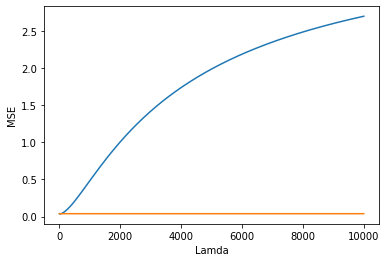

In [7]:
plt.plot(lamdalist,MSEList)
plt.ylabel("MSE")
plt.xlabel("Lamda")
plt.plot(np.arange(0,10000),LSMSE*np.ones(10000))

In [8]:
#Find the breakpoint to get the range of L's that produce RR's MSE<LS MSE
for i in range(0,10000):
    if LSMSE<MSEList[i]:
        print(i)
        breakpoint=i-1
        break
print ("New MSE is lower than old MSE for Lamda in the range of",lamdalist[0],"to",round(lamdalist[breakpoint],5))

537
New MSE is lower than old MSE for Lamda in the range of 0.0 to 53.6


We see that by using the Ridge Regression(RR) to estimate our thetas for Lamda=0 we get the same result as the LS(As expected) and for a range of Ls our RR MSE is lower than that of the LS method.That means that by using these Ls to create a model,our estimated Thetas explain the true model better than the Thetas of the LS method.